In [1]:
import math
import pickle
from pathlib import Path

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

2024-10-21 18:24:32.073603: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-21 18:24:32.074025: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 18:24:32.077717: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 18:24:32.085117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 18:24:32.095638: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
def load_dataset(dataset_path, filename):
    x, y = [], []

    for class_folder in dataset_path.iterdir():
        if class_folder.is_dir():
            for f in class_folder.iterdir():
                if f.is_file() and f.suffix.lower() == ".png":
                    try:
                        img = PIL.Image.open(f).convert('L')
                    except PIL.UnidentifiedImageError:
                        continue
                    img_array = np.array(img).flatten()
                    img_array = img_array / 255.0

                    x.append(img_array)
                    y.append(class_folder.name)

    x = np.array(x)
    y = np.array(y)

    with open(f'{filename}.pickle', 'wb') as f:
        pickle.dump((x, y), f)
    return x, y

In [3]:
def load_pickle(file_name):
    with open(f'{file_name}.pickle', 'rb') as f:
        x, y = pickle.load(f)
    return x, y

In [4]:
x_test, y_test = load_pickle("small")
x, y = load_pickle("large")

# Задание 1. Полносвязная нейронная сеть
два скрытых слоев:
- 1024 нейронов, функция активация relu
- 512 нейронов, функция активация relu

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(
        shape=(28 * 28,)
    ),
    tf.keras.layers.Dense(
        1024,
        activation='relu'
    ),
    tf.keras.layers.Dense(
        512,
        activation='relu',
    ),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,333,770 (5.09 MB)

 Trainable params: 1,333,770 (5.09 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_test = label_encoder.transform(y_test)

In [9]:
x_train, x_val, y_train, y_val = train_test_split(
    x,
    y,
    test_size=10000,
    train_size=200000,
    random_state=42,
    stratify=y
)

In [10]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_val = tf.keras.utils.to_categorical(y_val)

In [11]:
def show_history_plot(history):
    fig = plt.figure(figsize=(15, 4))

    fig.add_subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Training accuracy', 'Validation accuracy'])
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch Number')
    plt.ylabel('Accuracy')

    fig.add_subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training loss', 'Validation loss'])
    plt.title('Training and validation loss')
    plt.xlabel('Epoch Number')
    plt.ylabel('Loss')
    plt.show()

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7227 - loss: 1.1033 - val_accuracy: 0.8330 - val_loss: 0.6291
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8298 - loss: 0.6266 - val_accuracy: 0.8413 - val_loss: 0.5822
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8374 - loss: 0.5893 - val_accuracy: 0.8469 - val_loss: 0.5457
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8456 - loss: 0.5537 - val_accuracy: 0.8505 - val_loss: 0.5266
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8503 - loss: 0.5309 - val_accuracy: 0.8549 - val_loss: 0.5079
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8524 - loss: 0.5191 - val_accuracy: 0.8573 - val_loss: 0.4901
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8591 - loss: 0.4979 - val_accuracy: 0.8598 - val_loss: 0.4802
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8606 - loss: 0.4887 - val_accu

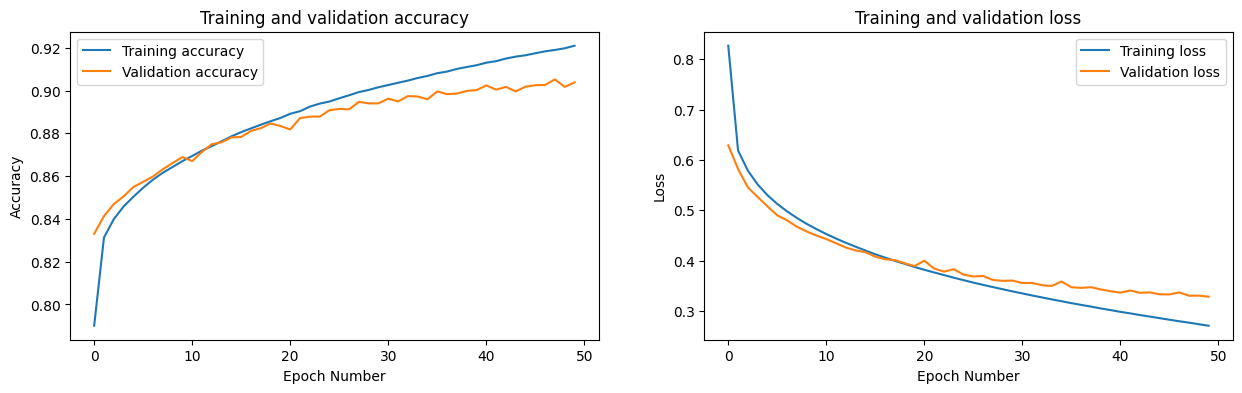

In [12]:
history = model.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=50,
    validation_data=(x_val, y_val)
)
show_history_plot(history)

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Classification accuracy on test set: ', test_acc)

586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9506 - loss: 0.1719
Classification accuracy on test set:  0.9519333243370056


# Задание 2. Сравнение с логистической регрессией
Точность классификатора с логистической регрессией составила 89%. На этом же наборе данных, полносвязная нейронная сеть на 50 эпохах смогла достичь 95%.

# Задание 3. Регуляризация и метод сброса нейронов
В первом варианте модель достигла 95% точности, однако заметно переобучение. Если увеличить количество эпох, то оно станет еще заметней. На каждый из двух скрытых слоев я добавила l2-регуляризацию с коэффициентом 0.001. Также после скрытых слоев я добавила сброс 20% нейронов

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(
        shape=(28 * 28,)
    ),
    tf.keras.layers.Dense(
        1024,
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(0.001),
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(0.001)
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,333,770 (5.09 MB)

 Trainable params: 1,333,770 (5.09 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.6500 - loss: 2.7923 - val_accuracy: 0.8308 - val_loss: 2.1586
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8145 - loss: 2.1944 - val_accuracy: 0.8404 - val_loss: 2.0580
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8266 - loss: 2.0938 - val_accuracy: 0.8468 - val_loss: 1.9824
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8344 - loss: 2.0144 - val_accuracy: 0.8501 - val_loss: 1.9199
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8392 - loss: 1.9514 - val_accuracy: 0.8534 - val_loss: 1.8618
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8434 - loss: 1.8908 - val_accuracy: 0.8566 - val_loss: 1.8097
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8461 - loss: 1.8409 - val_accuracy: 0.8590 - val_loss: 1.7605
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8503 - loss: 1.7861 - 

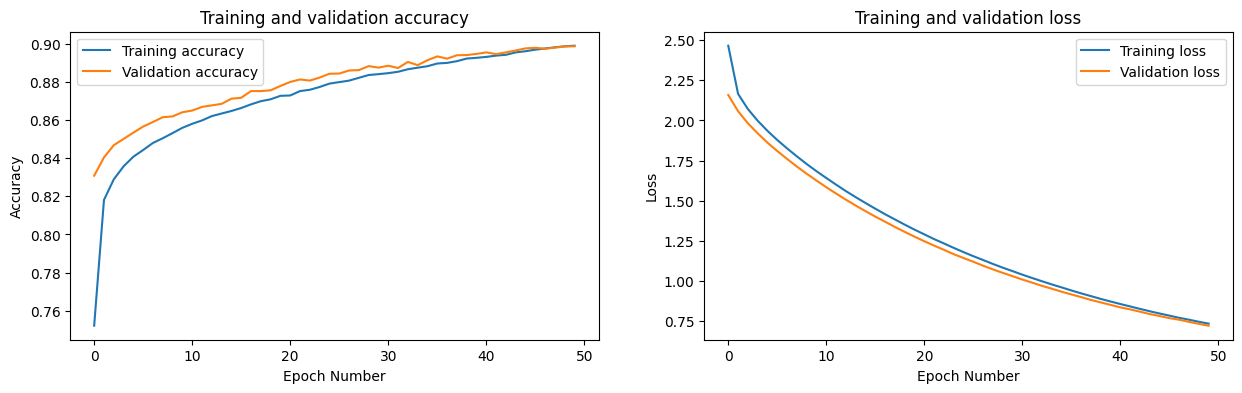

In [16]:
history = model.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=50,
    validation_data=(x_val, y_val)
)
show_history_plot(history)

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Classification accuracy on test set: ', test_acc)

586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9440 - loss: 0.5830
Classification accuracy on test set:  0.9490493535995483


В результате борьбы с переобучением, хоть и точность упала на 0.5%, но заметно снижение переобучения  

# Задание 4. Learning rate
Я добавила функцию step_decay(), которая динамически изменяет скорость обучения через каждые 10 эпох.

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        1024,
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(0.001),
        input_shape=(28 * 28,)
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(
        512,
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(0.001)
    ),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/home/user/Education/ML/lab1/lab1/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
def step_decay(self, epoch):
    initial_lr = 0.01
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
    return lr

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8587 - loss: 1.5430 - val_accuracy: 0.8733 - val_loss: 1.2633 - learning_rate: 0.0100
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8698 - loss: 1.2326 - val_accuracy: 0.8827 - val_loss: 1.0301 - learning_rate: 0.0100
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8789 - loss: 1.0095 - val_accuracy: 0.8851 - val_loss: 0.8664 - learning_rate: 0.0100
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8847 - loss: 0.8469 - val_accuracy: 0.8924 - val_loss: 0.7343 - learning_rate: 0.0100
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8905 - loss: 0.7284 - val_accuracy: 0.8962 - val_loss: 0.6427 - learning_rate: 0.0100
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8954 - loss: 0.6375 - val_accuracy: 0.8982 - val_loss: 0.5776 - learning_rate: 0.0100
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8968 - l

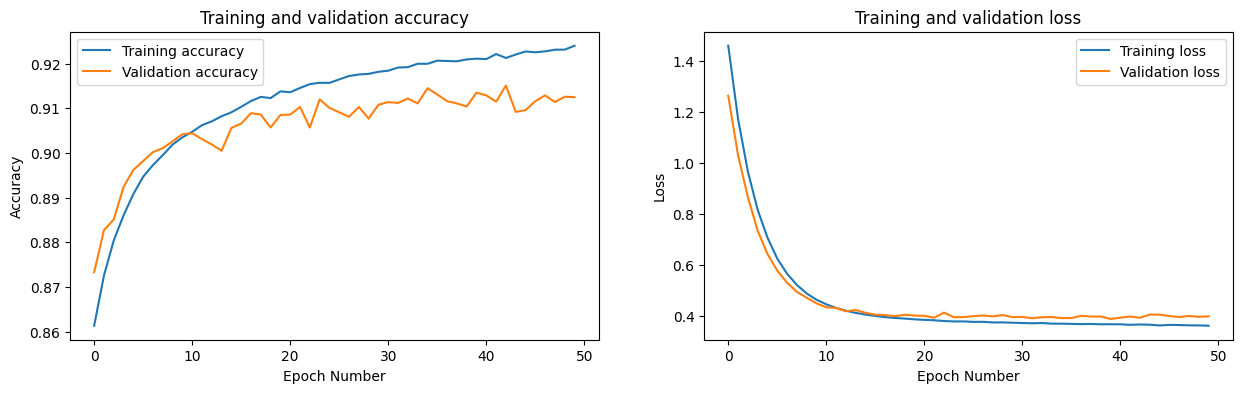

In [21]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay)

history = model.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[lr_scheduler]
)
show_history_plot(history)

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Classification accuracy on test set: ', test_acc)

586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9552 - loss: 0.2692
Classification accuracy on test set:  0.9587695002555847


В результате модель достигла 95,8% точности
Для сравнения:
- логистическа регрессия - 89%
- базовая полносвязная нейронная сеть
  
  Training set accuracy: 0.9209 - loss: 0.2715
  
  Validation set accuracy: 0.9038 - val_loss: 0.3285
  
  Classification accuracy on test set:  0.9519333243370056 - loss: 0.1719
  
- полносвязная нейронная сеть с регуляризацией и сбросом нейронов
  
  Training set accuracy: 0.8994 - loss: 0.7340
  
  Validation set accuracy:  0.8987 - val_loss: 0.7215
  
  Classification accuracy on test set:  0.9490493535995483 - loss: 0.5830
  
- полносвязная нейронная сеть с регуляризацией, сбросом нейронов и динамической скоростью обучения
  
  Training set accuracy: 0.9266 - loss: 0.3532
  
  Validation set accuracy:  0.9125 - val_loss: 0.3981
  
  Classification accuracy on test set:  0.9587695002555847 - loss: 0.2692